# Install Kaggle Library

In [ ]:
!pip install q kaggle


In [2]:
from google.colab import files
import pandas as pd
import numpy as np
from google.colab import autoviz
import seaborn as sns

# Upload kaggle json api file

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"imadelkhlifi","key":"e7bd6c703fdf1ebd24384b8721cef869"}'}

# Make a folder in user directory
!mkdir ~/.kaggle is used to create a new folder named .kaggle in the home directory of the user.

In [4]:
!mkdir ~/.kaggle

# Copy Kaggle Api credentials to folder created
!cp kaggle.json ~/.kaggle/ is used to copy the Kaggle API credentials file named kaggle.json to the .kaggle folder in the home directory of the user.

In [5]:
!cp kaggle.json ~/.kaggle/

# We will download our dataset which we will use

In [6]:
!kaggle datasets download -d puneet6060/intel-image-classification

 99% 342M/346M [00:01<00:00, 178MB/s]
100% 346M/346M [00:01<00:00, 195MB/s]


# Unzip the downloaded dataset

In [ ]:
! unzip /content/intel-image-classification.zip

In [ ]:
#!rm -rf seg_pred

## Import Libraries

In [8]:
import pandas as pd
import numpy as np
import os
import cv2
import glob as gb
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import pickle as pk
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

# Image processing and data augmentation:¶


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


In [10]:
img_size = 150
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1/255.,rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory('/content/seg_train/seg_train',target_size=(img_size, img_size),batch_size=batch_size,shuffle=True,class_mode='sparse')
test_generator = test_datagen.flow_from_directory('/content/seg_test/seg_test',target_size=(img_size, img_size),batch_size=batch_size,shuffle=False,class_mode='sparse')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


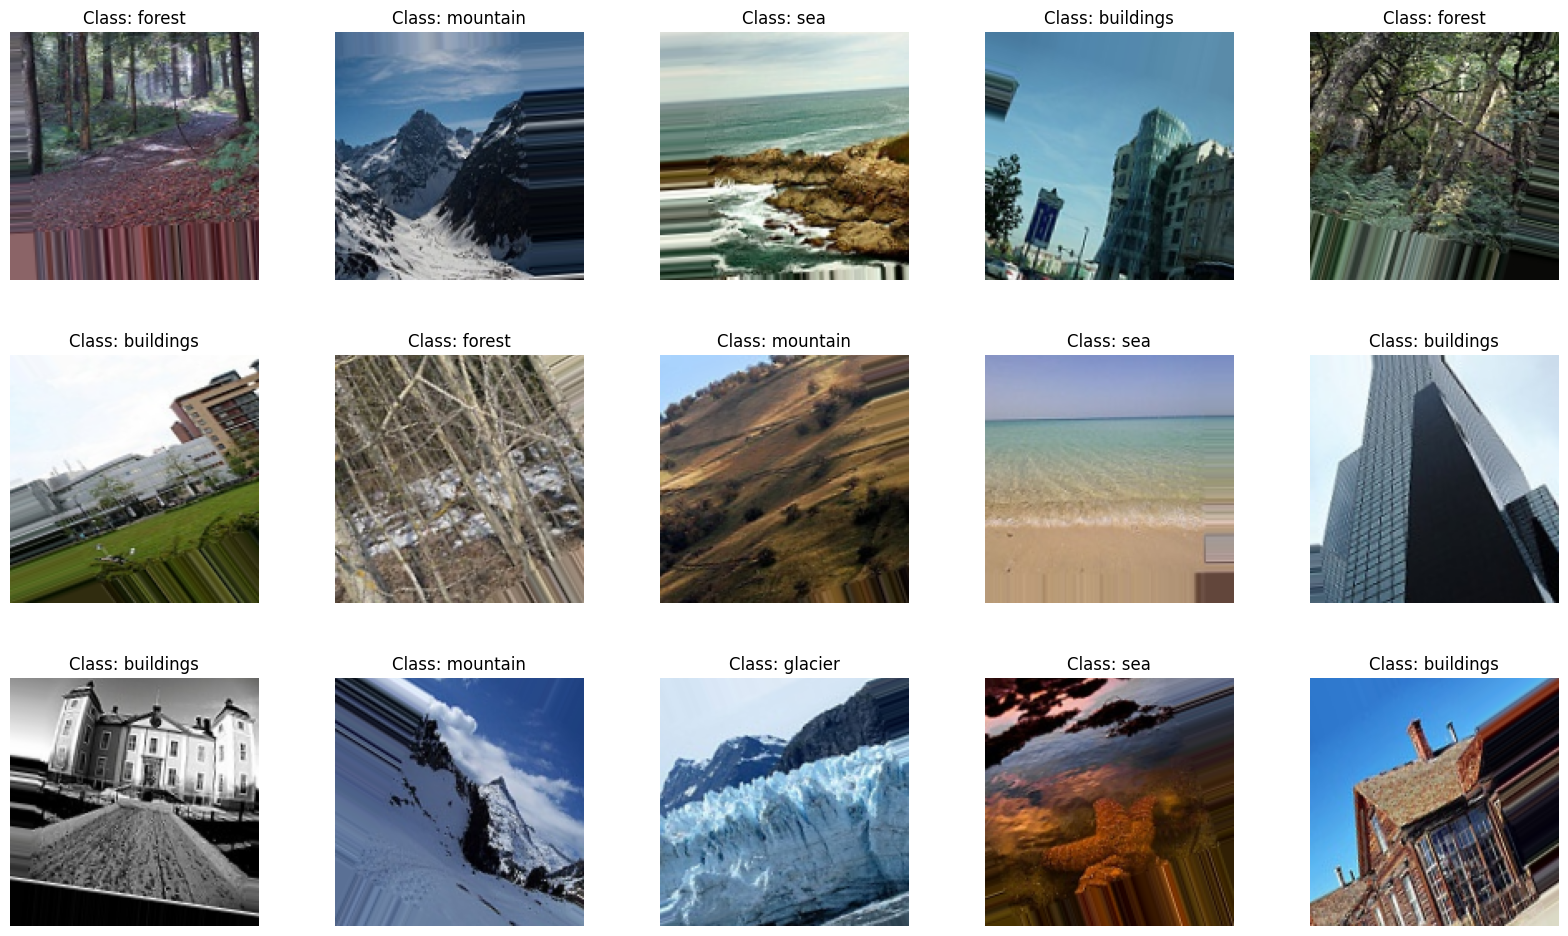

In [17]:
labels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

samples = train_generator.__next__()
images = samples[0]
target = samples[1]

plt.figure(figsize = (20,20))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[int(target[i])]}")
    plt.axis('off')
plt.savefig('11.pdf',dpi=300)

#Building CNN model

In [12]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout

model = Sequential()

model.add(Conv2D(32, (3,3), input_shape= (img_size,img_size,3), activation = 'relu', padding = 'same')) #padding = same size output
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation = 'softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 128)       0

#Training the model

In [18]:
history = model.fit(train_generator, validation_data=test_generator, epochs=10)


Epoch 1/10
439/439 [==============================] - 918s 2s/step - loss: 1.0149 - accuracy: 0.5956 - val_loss: 0.8765 - val_accuracy: 0.6730
Epoch 2/10
439/439 [==============================] - 899s 2s/step - loss: 0.8407 - accuracy: 0.6821 - val_loss: 0.6031 - val_accuracy: 0.7827
Epoch 3/10
439/439 [==============================] - 905s 2s/step - loss: 0.7257 - accuracy: 0.7341 - val_loss: 0.6247 - val_accuracy: 0.7777
Epoch 4/10
439/439 [==============================] - 894s 2s/step - loss: 0.6684 - accuracy: 0.7619 - val_loss: 0.5870 - val_accuracy: 0.7907
Epoch 5/10
439/439 [==============================] - 895s 2s/step - loss: 0.6409 - accuracy: 0.7663 - val_loss: 0.5427 - val_accuracy: 0.8097
Epoch 6/10
439/439 [==============================] - 867s 2s/step - loss: 0.6020 - accuracy: 0.7847 - val_loss: 0.5070 - val_accuracy: 0.8120
Epoch 7/10
439/439 [==============================] - 896s 2s/step - loss: 0.5742 - accuracy: 0.7962 - val_loss: 0.4443 - val_accuracy: 0.8390

#Visualising the training loss and accuracies

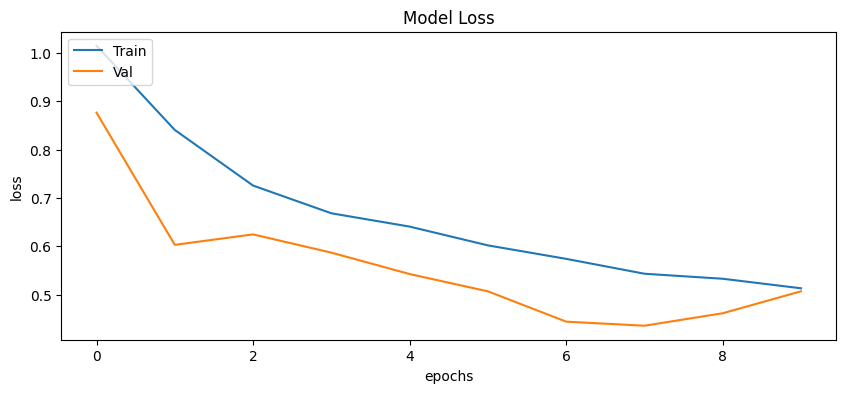

In [19]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.savefig('13.pdf',dpi=300)
plt.show()

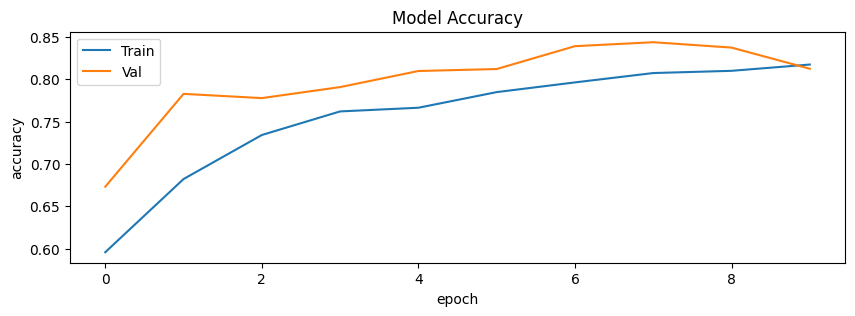

In [20]:
plt.figure(figsize=(10,3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.savefig('14.pdf',dpi=300)
plt.show()

#Making predictions on the test set

In [21]:
predictions = model.predict(test_generator)

# Get the predicted class for each image
predicted_classes = np.argmax(predictions, axis=1)

print('Predicted classes:', predicted_classes)
print('True labels:', test_generator.classes)

94/94 [==============================] - 47s 499ms/step
Predicted classes: [0 0 0 ... 3 0 5]
True labels: [0 0 0 ... 5 5 5]


#Evaluating model performance

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [23]:
print('Accuracy:\n', accuracy_score(test_generator.classes, predicted_classes))


Accuracy:
 0.8123333333333334


#Classification report

In [24]:
print('Classification Report:\n', classification_report(test_generator.classes, predicted_classes))


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       437
           1       0.89      0.99      0.94       474
           2       0.71      0.87      0.78       553
           3       0.74      0.78      0.76       525
           4       0.95      0.56      0.71       510
           5       0.88      0.83      0.85       501

    accuracy                           0.81      3000
   macro avg       0.83      0.82      0.81      3000
weighted avg       0.83      0.81      0.81      3000



#Visualising Misclassifications

In [25]:
print('Confusion Matrix:\n', confusion_matrix(test_generator.classes, predicted_classes))


Confusion Matrix:
 [[376   8   4   3   2  44]
 [  1 470   0   2   0   1]
 [  8   7 479  50   5   4]
 [  8   5  94 410   7   1]
 [ 28  14  93  83 288   4]
 [ 56  23   3   3   2 414]]


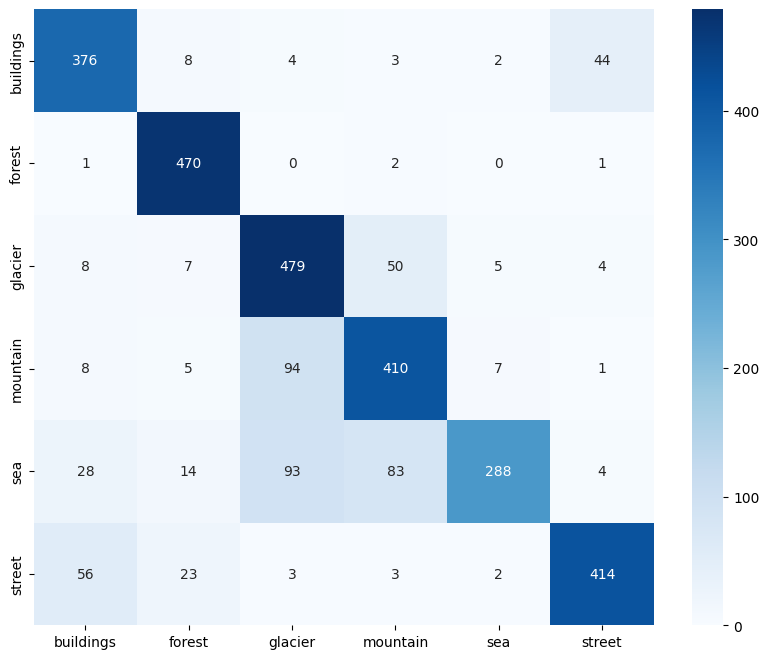

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(test_generator.classes, predicted_classes),annot=True,fmt='.3g',xticklabels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
            yticklabels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],cmap='Blues')
plt.savefig('15.pdf',dpi=300)
plt.show()

In [27]:
files = test_generator.filenames
data = pd.DataFrame()
data['file'] = files
data['actual_class'] = test_generator.classes
data['predicted_class'] = predicted_classes

In [28]:
misclassification = data[data['actual_class']!=data['predicted_class']]


In [29]:
len(misclassification)


563

In [30]:
misclassification


,file,actual_class,predicted_class
19,buildings/20231.jpg,0,1
20,buildings/20241.jpg,0,5
22,buildings/20246.jpg,0,5
25,buildings/20294.jpg,0,5
30,buildings/20374.jpg,0,2
...,...,...,...
2989,street/24250.jpg,5,0
2991,street/24268.jpg,5,0
2994,street/24280.jpg,5,0
2997,street/24315.jpg,5,3
